In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [96]:
train=pd.read_excel(r'D:\Final_Train.xlsx')
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [97]:
train.shape

(5961, 7)

In [98]:
test=pd.read_excel(r'D:\Final_Test.xlsx')
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [99]:
test.shape

(1987, 6)

In [100]:
df=pd.concat([train,test],axis=0)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [101]:
df.shape

(7948, 7)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [103]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

Fees is float types and it is our target variables, hence problem is Regression Type

In [104]:
df['Experience']=df.Experience.str.extract('(\d+)')

In [105]:
df['Rating']=df.Rating.str.extract('(\d+)')

In [106]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [107]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

<AxesSubplot:>

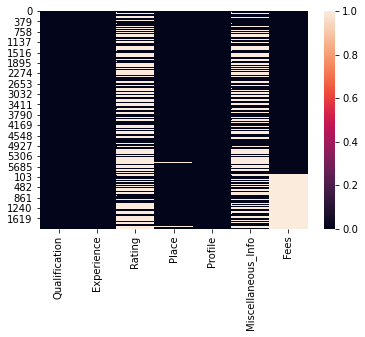

In [108]:
sns.heatmap(df.isnull())

so null values are present in the data set

# Filling null values

In [109]:
df["Rating"]=df["Rating"].fillna(method="ffill")
df["Place"]=df["Place"].fillna(method="ffill")
df["Miscellaneous_Info"]=df["Miscellaneous_Info"].fillna(method="ffill")
df["Fees"]=df["Fees"].fillna(df["Fees"].mean())

In [110]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

<AxesSubplot:>

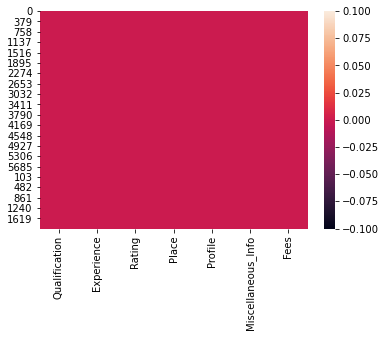

In [111]:
sns.heatmap(df.isnull())

As Miscellaneous_Info columns has nothing to do, so let's drop it

In [112]:
x=np.where(df.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)

In [113]:
for i in x:
    print(df.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [114]:
df['MBBS']=df.Qualification.str.extract('(MBBS)')
df['BDS']=df.Qualification.str.extract('(BDS)')
df['MD']=df.Qualification.str.extract('(MD)')
df['MS']=df.Qualification.str.extract('(MS)')
df['LCEH']=df.Qualification.str.extract('(LCEH)')
df['DDVL']=df.Qualification.str.extract('(DDVL)')
df['BAMS']=df.Qualification.str.extract('(BAMS)')
df['BSAM']=df.Qualification.str.extract('(BSAM)')
df['BHMS']=df.Qualification.str.extract('(BHMS)')
df['DHMS']=df.Qualification.str.extract('(DHMS)')
df['DNB']=df.Qualification.str.extract('(DNB)')
df['Get']=df.Qualification.str.extract('(Get inspired)')

In [115]:
df.iloc[:,10:22]=df.iloc[:,10:22].fillna(0)

In [116]:
df.iloc[:,10:22]=df.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [117]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,NaN,NaN,MD,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,NaN,NaN,MD,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,98,"Mathikere - BEL, Bangalore",ENT Specialist,"98% 76 Feedback Whitefield, Bangalore",300.0,MBBS,NaN,NaN,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,98,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0


In [118]:
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [119]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,NaN,NaN,MD,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,NaN,NaN,MD,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,98,"Mathikere - BEL, Bangalore",ENT Specialist,"98% 76 Feedback Whitefield, Bangalore",300.0,MBBS,NaN,NaN,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,98,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              7948 non-null   object 
 3   Place               7948 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  7948 non-null   object 
 6   Fees                7948 non-null   float64
 7   MBBS                3784 non-null   object 
 8   BDS                 1790 non-null   object 
 9   MD                  3073 non-null   object 
 10  MS                  7948 non-null   int64  
 11  LCEH                7948 non-null   int64  
 12  DDVL                7948 non-null   int64  
 13  BAMS                7948 non-null   int64  
 14  BSAM                7948 non-null   int64  
 15  BHMS                7948 non-null   int64  
 16  DHMS  

In [121]:
df.describe()

,Fees,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,307.944640,0.362481,0.002768,0.028686,0.126447,0.001258,0.125315,0.008178,0.070710
std,165.338426,0.480747,0.052542,0.166934,0.332373,0.035451,0.331096,0.090068,0.256355
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307.944640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                     0
MBBS                  4164
BDS                   6158
MD                    4875
MS                       0
LCEH                     0
DDVL                     0
BAMS                     0
BSAM                     0
BHMS                     0
DHMS                     0
DNB                      0
Get                      0
dtype: int64

In [123]:
df['MBBS'] = df['MBBS'].fillna(0)
df['BDS'] = df['BDS'].fillna(0)
df['MD'] = df['MD'].fillna(0)

In [124]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
MBBS                  0
BDS                   0
MD                    0
MS                    0
LCEH                  0
DDVL                  0
BAMS                  0
BSAM                  0
BHMS                  0
DHMS                  0
DNB                   0
Get                   0
dtype: int64

In [125]:
cor=df.corr()
cor

,Fees,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB
Fees,1.000000,-0.003334,0.003953,0.060275,-0.121714,-0.015148,-0.002100,0.013543,0.120078
MS,-0.003334,1.000000,-0.034745,-0.126449,0.504561,0.017537,0.501971,0.120424,-0.090580
LCEH,0.003953,-0.034745,1.000000,-0.009054,-0.020044,-0.001870,-0.012708,-0.004784,-0.014533
DDVL,0.060275,-0.126449,-0.009054,1.000000,-0.065384,-0.006100,-0.065048,-0.015605,0.023165
BAMS,-0.121714,0.504561,-0.020044,-0.065384,1.000000,0.050572,-0.144007,-0.034548,-0.104948
BSAM,-0.015148,0.017537,-0.001870,-0.006100,0.050572,1.000000,-0.013434,-0.003223,-0.009791
BHMS,-0.002100,0.501971,-0.012708,-0.065048,-0.144007,-0.013434,1.000000,-0.004833,-0.104409
DHMS,0.013543,0.120424,-0.004784,-0.015605,-0.034548,-0.003223,-0.004833,1.000000,-0.025048
DNB,0.120078,-0.090580,-0.014533,0.023165,-0.104948,-0.009791,-0.104409,-0.025048,1.000000


<AxesSubplot:>

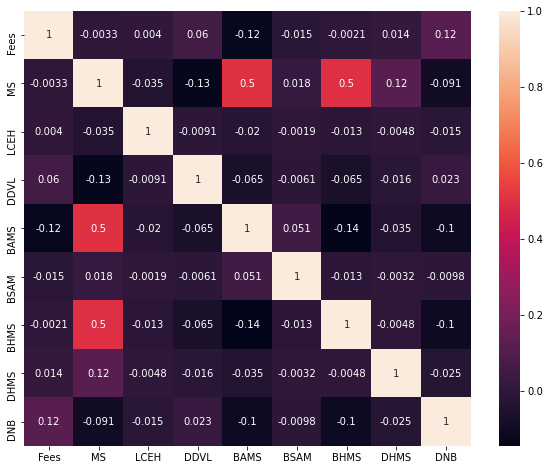

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

In [127]:
cor['Fees'].sort_values(ascending=False)

Fees    1.000000
DNB     0.120078
DDVL    0.060275
DHMS    0.013543
LCEH    0.003953
BHMS   -0.002100
MS     -0.003334
BSAM   -0.015148
BAMS   -0.121714
Name: Fees, dtype: float64

# Bi_variate Analysis

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

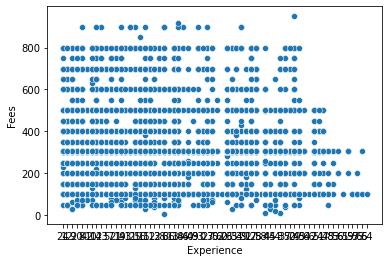

In [128]:
sns.scatterplot(x="Experience",y="Fees",data=df)

As per the above visualization,Fees is directly proportional to Experience

<AxesSubplot:xlabel='Profile', ylabel='count'>

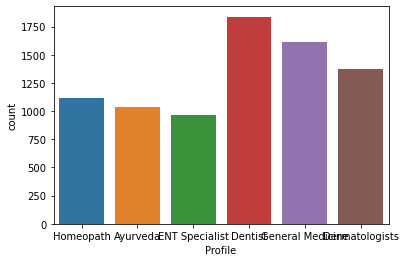

In [129]:
sns.countplot(df["Profile"])

In [141]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,0,0,MD,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,0,0,MD,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,98,"Mathikere - BEL, Bangalore",ENT Specialist,"98% 76 Feedback Whitefield, Bangalore",300.0,MBBS,0,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,98,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,0,0,0,1,0,0,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,0,0,0,1,0,0,1,0,0,0,0,0


In [143]:
df.Profile=df.Profile.astype('category')

In [145]:
df.Experience.value_counts()

9     419
10    404
8     380
11    374
12    358
     ... 
58      1
64      1
60      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64

In [147]:
df.Experience=df.Experience.astype('int64')

array([[<AxesSubplot:title={'center':'Experience'}>]], dtype=object)

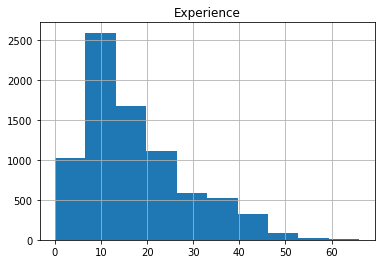

In [148]:
df.hist('Experience')

In [149]:
y=df.groupby('Experience')['Fees'].mean()
y

Experience
0     226.832914
2     249.842388
3     269.251202
4     283.135624
5     295.786689
         ...    
60    100.000000
61    100.000000
64    100.000000
65    203.972320
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [151]:
a=[1,2,3,4,5,6,7,8]
df['Experience']=pd.cut(df.Experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [152]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",4,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,0,0,MD,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",3,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,0,0,MD,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",3,98,"Mathikere - BEL, Bangalore",ENT Specialist,"98% 76 Feedback Whitefield, Bangalore",300.0,MBBS,0,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",3,98,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,0,0,0,1,0,0,1,0,0,0,0,0
4,BAMS,4,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,0,0,0,1,0,0,1,0,0,0,0,0


In [153]:
df.isnull().sum()

Qualification         0
Experience            1
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
MBBS                  0
BDS                   0
MD                    0
MS                    0
LCEH                  0
DDVL                  0
BAMS                  0
BSAM                  0
BHMS                  0
DHMS                  0
DNB                   0
Get                   0
dtype: int64

In [155]:
test=df.iloc[5962:,:]
train=train.iloc[:5961,:]

In [158]:
train.shape

(5961, 7)

In [159]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [161]:
train.Place=train.Place.astype('category')

test.Place=test.Place.astype('category')

In [162]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [163]:
del test['Fees']

In [164]:
df=train
df_label=df['Fees']
train , val = train_test_split(train,test_size=0.20,random_state=67)

In [165]:
train_label=train.Fees
val_label=val.Fees

In [166]:
del train['Fees']
del val['Fees']
del df['Fees']

In [167]:
def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [168]:
def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

In [169]:
lr=LinearRegression()
score_lr=func(lr,df,df_label,10)

In [170]:
score_lr.mean()

1189678736272673.5

In [171]:
lr.fit(df,df_label)
total=lr.predict(val)

In [172]:
rmsle_lr,std_lr=rmsle(total,val_label)
rmsle_lr,std_lr

(0.13852465933584654, 0.0)

In [173]:
sg=SGDRegressor(tol=1e-30)
score_sg=func(sg,df,df_label,10)
score_sg.mean()

168.89258046591647

In [174]:
sg.fit(train,train_label)
score=sg.predict(val)
rmsle_sg,std_sg=rmsle(score,val_label)
rmsle_sg,std_sg

(0.2769640511083879, 0.0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
score_dtr=func(dtr,df,df_label,10)
score_dtr.mean()

In [ ]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

In [ ]:
svm=SVR(kernel='rbf',gamma=0.05,C=70)
score_svm=func(svm,df,df_label,10)
score_svm.mean()

In [ ]:
svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

In [ ]:
score_knn=[]
for k in range(30,70):
    knn=KNeighborsRegressor(k,algorithm='auto')
    score=func(knn,df,df_label,10)
    score=score.mean()
    score_knn.append(score)

In [ ]:
pd.Series(score_knn,index=range(30,70)).sort_values()

In [ ]:
knn=KNeighborsRegressor(40,algorithm='auto')

score=func(knn,train,train_label,10)
score_knn=score.mean()
score_knn

In [ ]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

In [ ]:
xgb=xgboost.XGBRegressor()
score=func(xgb,df,df_label,10)
score_xg=score.mean()
score_xg

In [ ]:
xgb.fit(train,train_label)
score=xgb.predict(val)
rmsle_xg,std_xg=rmsle(score,val_label)
rmsle_xg,std_xg